In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
file_path = "../scraper/scraped_data/data_selenium.json"
# Load JSON file
with open(file_path) as file:
    data = json.load(file)
print(data)

[{'url': 'https://www.svf.gov.lk/index.php?lang=en', 'title': 'Shrama Vasana Fund - Home', 'texts': ['Menu', 'About Us', 'Contributions', 'Services', 'Downloads', 'Gallery', 'News & Events', 'Donate Us', 'Vacancy', 'FAQs', 'Contact Us', 'Sitemap', 'About Us', 'Overview', 'Our Team', 'Organisation Structure', 'Gallery', 'Image Gallery', 'Video Gallery', 'Contact Us', 'Inquiry', 'Contact Details', 'සිංහල', 'தமிழ்', 'About Us', 'Overview', 'Our Team', 'Organisation Structure', 'Contributions', 'Services', 'Downloads', 'Gallery', 'Image Gallery', 'Video Gallery', 'News & Events', 'Donate Us', 'Vacancy', 'FAQs', 'Contact Us', 'Inquiry', 'Contact Details', 'Sitemap', 'Health Clinics & Eye Clinics', 'Eye Clinic', 'Empowerment', 'News & Events', 'New', 'Vacancies extended till 2024.04.26', 'New', 'Vacancies extended till 2024.04.26', 'New', 'Vacancies extended till 2024.04.26', 'New', 'Vacancies extended till 2024.04.26', 'New', 'Vacancies extended till 2024.04.26', 'New', 'Vacancies extended 

In [3]:
# Convert to pandas dataframe
df = pd.DataFrame(data)
df.head()

,url,title,texts,images,pdf_links,pdf_extracted,image_extracted
0,https://www.svf.gov.lk/index.php?lang=en,Shrama Vasana Fund - Home,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[],{},{'https://www.svf.gov.lk/images/homeicon.png':...
1,https://www.svf.gov.lk/index.php?option=com_co...,Shrama Vasana Fund - Overview,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[],{},{'https://www.svf.gov.lk/images/homeicon.png':...
2,https://www.svf.gov.lk/index.php?option=com_co...,Shrama Vasana Fund - Contributions,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[],{},{'https://www.svf.gov.lk/images/homeicon.png':...
3,https://www.svf.gov.lk/index.php?option=com_co...,Shrama Vasana Fund - Services,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[],{},{'https://www.svf.gov.lk/images/homeicon.png':...
4,https://www.svf.gov.lk/index.php?option=com_co...,Shrama Vasana Fund - Downloads,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[https://www.svf.gov.lk/images/pdfs/act_en.pdf...,{'https://www.svf.gov.lk/images/pdfs/act_en.pd...,{'https://www.svf.gov.lk/images/homeicon.png':...


In [4]:
print(f"Count of unique urls: {df['url'].nunique()}")
print(f"Count of unique titles: {df['title'].nunique()}")

texts = [text for sublist in df['texts'] for text in sublist]
unique_texts = set(texts)
print(f"Count of unique texts: {len(unique_texts)}")

images = [image for sublist in df['images'] for image in sublist]
unique_images = set(images)
print(f"Count of unique images: {len(unique_images)}")

pdf_links = [pdf for sublist in df['pdf_links'] for pdf in sublist]
unique_pdfs = set(pdf_links)
print(f"Count of unique pdfs: {len(unique_pdfs)}")


Count of unique urls: 14
Count of unique titles: 14
Count of unique texts: 381
Count of unique images: 79
Count of unique pdfs: 15


In [5]:
def plot_word_cloud(texts):
    combined_text = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

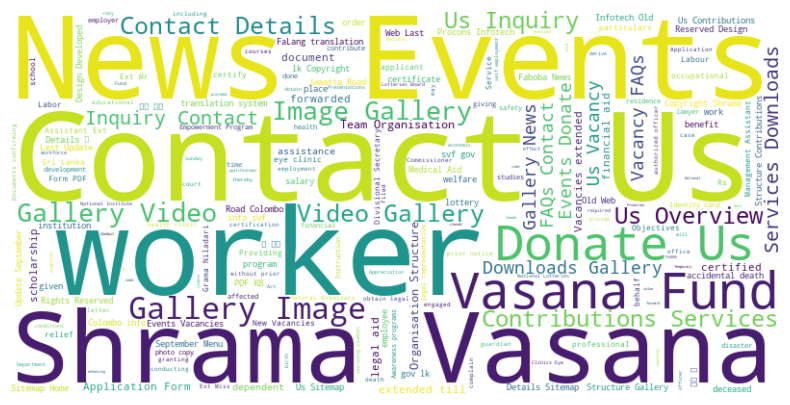

In [6]:
# Plot word cloud for texts
plot_word_cloud(texts)

In [14]:
# store extracted texts from pdf as list
extracted_texts_pdf = []
for dict in df['pdf_extracted']: 
    extracted_texts_pdf.append(list(dict.values()))


pdf_texts = [text for sublist in extracted_texts_pdf for text in sublist]
print(pdf_texts)


['PARLIAMENT OF THE DEMOCRATIC\nSOCIALIST REPUBLIC OF\nSRI LANKA\n\nSHRAMA VASANA FUND ACT, No. 12 OF 1998\n\n[Certified on 31st March, 1998]\n\nPrinted on the Order of Government\n\nPublished as a Supplement to Part II of the Gazette of the Democratic Socialist\nRepublic of Sri Lanka of April 03, 1998\n\nPRINTED AT THE DEPARTMENT OF COWERAMENS PRINTING SRI LANKA\n\nTOBE PURCHASED AT THE GOVERNMENT PUBLICATIONS BUREAD, COLOR |\n\nPrice: Rs, 8.00 Postage : Rs. 2.50\nShrama Vasana Fund Act, No. 12 of 1998\n\n[Certified on 31st March, 1998]\nL. D.—O. 38/96.\n\nAn ACT TO PROVIDE FOR THE ESTABLISHMENT OF A FUND CALLED\nAND KNOWN AS “SHRAMA VASANA FUND” FOR THE PROVISION\nOF MONEYS FOR THE WELFARE OF EMPLOYEES ; AND TO PROVIDE\nFOR MATTERS CONNECTED THEREWITH OR INCIDENTAL THERETO.\n\nBE it enacted by the Parliament of the Democratic Socialist\nRepublic of Sri Lanka as follows :—\n\n1. This Act may be cited as the Shrama Vasana Fund\nAct, No. 12 of 1998.\n\n2. (1) There shall be established 

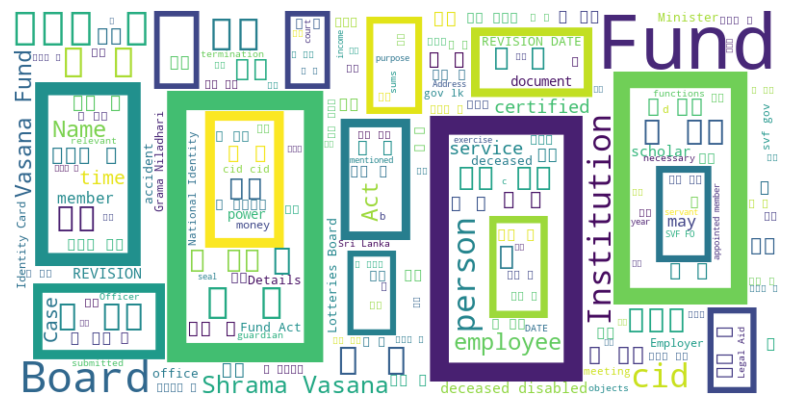

In [15]:
# Plot word cloud for pdf texts
plot_word_cloud(pdf_texts)

Here we notice that the extracted pdf texts contains many non-english characters which should be pre-processed in the data pre-processing stage (Our chabot aims to support English, Malay, Chinese and Tamil languages).

In [16]:
extracted_texts_images = []
for dict in df['image_extracted']: 
    extracted_texts_images.append(list(dict.values()))


image_texts = [text for sublist in extracted_texts_images for text in sublist]

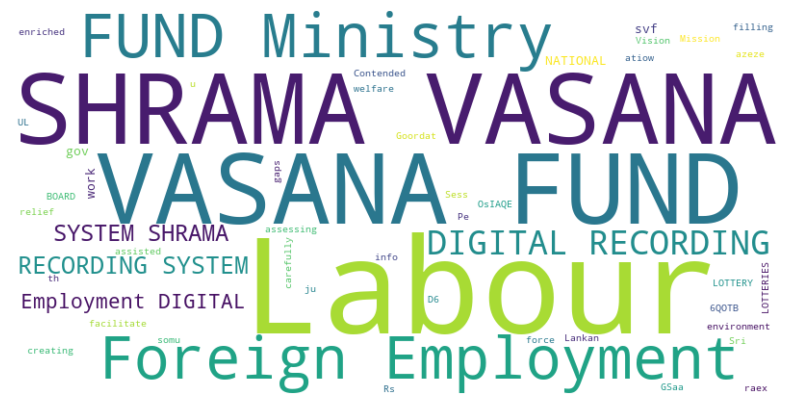

In [17]:
# Plot word cloud for image texts
plot_word_cloud(image_texts)

In [18]:
def get_top_words(text, num_words):
  CV = CountVectorizer(stop_words='english') # may not work well to remove stop words for Sinhala language (affect extracted pdf texts)
  word_count = CV.fit_transform(text)

  word_sum = word_count.sum(axis=0)

  frequency = []
  for word, index in CV.vocabulary_.items():
    frequency.append((word, word_sum[0, index]))

  frequency = sorted(frequency, key=lambda x: x[1], reverse=True)[:num_words]
  return frequency

In [19]:
# Top 10 most frequently used texts
get_top_words(texts, 10)

[('gallery', 108),
 ('contact', 79),
 ('aid', 52),
 ('2024', 49),
 ('shrama', 45),
 ('services', 44),
 ('news', 43),
 ('events', 43),
 ('workers', 42),
 ('vasana', 42)]

In [20]:
# Top 10 most frequently used pdf texts

get_top_words(pdf_texts, 10)

[('කර', 107),
 ('fund', 82),
 ('සහත', 58),
 ('කය', 55),
 ('shall', 53),
 ('board', 53),
 ('කම', 49),
 ('නය', 44),
 ('cid', 44),
 ('පත', 42)]

In [21]:
# Top 10 most frequently used image texts

get_top_words(image_texts, 10)

[('shrama', 14),
 ('vasana', 14),
 ('fund', 14),
 ('ministry', 14),
 ('labour', 14),
 ('foreign', 14),
 ('employment', 14),
 ('digital', 14),
 ('recording', 14),
 ('work', 2)]